# Using CuPy on CARC

CuPy is an open-source array library for GPU-accelerated computing with Python. CuPy makes use of CUDA Tookkit libraries to make full use of GPU archtecture. This is a brief demo on installing and using CuPy on CARC's systems.

## Conda Environment

For this demo, you must first install the following python libraries to a conda environment: `cupy`, `numpy`, and `matplotlib`. It is also recommended that you install `ipykernel` so that you can run your code on CARC's JupyterHub interface, like in this tutorial. 

## Code Example

This example will compare the performance of a computation when performed on a cpu using numpy and when on a gpu using cupy.

Start by importing all the libraries used.

In [1]:
import cupy as cp
import numpy as np
import time
import matplotlib.pyplot as plt

Perform an elementwise sin operation on random arrays of increasing sizes.
The computation time for both a cpu and gpu are recorded for each array.

In [3]:
np.random.seed(1)

cpuTimes = []
gpuTimes = []
sizes = []

for i in range(1000,1000000,1000):
    array = np.random.rand(i,1)

    x_gpu = cp.array(array)

    startTime = time.time()
    l2_gpu = cp.sin(x_gpu)
    gpuTime = time.time() - startTime

    x_cpu = np.array(array)

    startTime = time.time()
    l2_cpu = np.sin(x_cpu)
    cpuTime = time.time() - startTime
    
    sizes.append(i)
    cpuTimes.append(cpuTime)
    gpuTimes.append(gpuTime)




Plot the results (blue for cpu and red for gpu).

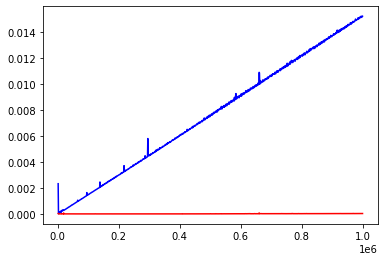

In [4]:
plt.plot(sizes,cpuTimes, '-b')
plt.plot(sizes,gpuTimes, '-r')



In [5]:
print("Cpu Time: ", cpuTime)
print("GPU Time: ", gpuTime)

print("Speed up: ", cpuTime/gpuTime)


Cpu Time:  0.015197992324829102
GPU Time:  5.221366882324219e-05
Speed up:  291.0730593607306
